<a href="https://colab.research.google.com/github/omidtorkan/Image-Classi-cation-via-Neural-Network/blob/master/neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** *italicized text*1. import necessry libraries**



In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from PIL import Image
import shutil  

base_path = '/content/gdrive/My Drive'
new_data_set_path = '/content/gdrive/My Drive/final-data-set'

**2. connect to google drive to access dataset.**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**3. test connection**

In [0]:
# list all folders and files in My Drive
! ls '/content/gdrive/My Drive'

 10    20    5	 'Colab Notebooks'  'Getting started.pdf'   validation.txt
 100   200   50   final-data-set     train.txt


**4. define model parameters such as number of epochs,... and create data generator for partialy read big dataset**

In [0]:
#define categories:
categories = {0 : '5', 1: '10', 2: '20', 3: '50', 4: '100', 5: '200'}

# define model parameters.
mini_batch = 50 # every 50 samples gradient update weights.
epochs = 12 # how many times model continues to learn.
number_of_train = 5550
number_of_test = 450

# preprocess train data.
# normalize rgb pixel values between 0, 1.
train_datagen = ImageDataGenerator(
    rescale=1./255
)
# preprocess test data.
# normalize rgb pixel values between 0, 1.
test_datagen = ImageDataGenerator(
    rescale=1./255
)
# create train data generator to read train dataset partialy.
train_generator = train_datagen.flow_from_directory(
    new_data_set_path+'/train',
    
    target_size=(180, 320),
    batch_size=mini_batch,
)
# create train data generator to read test dataset partialy.
test_generator = test_datagen.flow_from_directory(
        new_data_set_path+'/test',
        target_size=(180, 320),
        batch_size=mini_batch)

Found 5550 images belonging to 6 classes.
Found 450 images belonging to 6 classes.


**5. define structure of neural net model**

In [0]:
model=Sequential()
model.add(Conv2D(input_shape=(180, 320 ,3),padding='same',kernel_size=3,filters=16))
model.add(LeakyReLU(0.1))
model.add(Conv2D(padding='same',kernel_size=3,filters=32))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(padding='same',kernel_size=3,filters=32))
model.add(LeakyReLU(0.1))
model.add(Conv2D(padding='same',kernel_size=3,filters=64))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(LeakyReLU(0.1))
model.add(Dense(len(categories)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 320, 16)      448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 180, 320, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 320, 32)      4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 180, 320, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 160, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 160, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 160, 32)      

**6. compile model and set optimizer method and loss function for it**


In [0]:
model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])

**7.start training and keep track loss and accuracy for plot curves after training**

In [0]:
histObject = model.fit(train_generator,
          steps_per_epoch=(number_of_train // 100),
          epochs=12,
          verbose=1,
          validation_data=test_generator)

Epoch 1/12


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 58 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/55 [>.............................] - ETA: 31:45 - loss: 23.1782 - accuracy: 0.1100

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/55 [>.............................] - ETA: 30:44 - loss: 25.7231 - accuracy: 0.1467

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 72 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/55 [=>............................] - ETA: 29:42 - loss: 23.1063 - accuracy: 0.1800

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 68 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/55 [=>............................] - ETA: 29:04 - loss: 20.4151 - accuracy: 0.1720

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/55 [==>...........................] - ETA: 28:17 - loss: 17.5008 - accuracy: 0.1967

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/55 [==>...........................] - ETA: 27:44 - loss: 16.6511 - accuracy: 0.1914

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 76 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/55 [===>..........................] - ETA: 27:02 - loss: 15.1423 - accuracy: 0.1825

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 74 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/55 [===>..........................] - ETA: 26:20 - loss: 13.7098 - accuracy: 0.1733

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/55 [====>.........................] - ETA: 26:20 - loss: 12.5120 - accuracy: 0.1900

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 55 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/55 [=====>........................] - ETA: 25:37 - loss: 11.5610 - accuracy: 0.1927

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 84 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/55 [=====>........................] - ETA: 24:52 - loss: 10.8115 - accuracy: 0.1900

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/55 [======>.......................] - ETA: 24:23 - loss: 10.2153 - accuracy: 0.1877

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/55 [======>.......................] - ETA: 23:47 - loss: 9.6308 - accuracy: 0.1886 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 47 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/55 [=======>......................] - ETA: 23:06 - loss: 9.1198 - accuracy: 0.1880

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/55 [=======>......................] - ETA: 22:26 - loss: 8.6604 - accuracy: 0.1912

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/55 [========>.....................] - ETA: 21:50 - loss: 8.2592 - accuracy: 0.1906

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/55 [========>.....................] - ETA: 21:10 - loss: 7.8903 - accuracy: 0.1956

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/55 [=========>....................] - ETA: 20:31 - loss: 7.5625 - accuracy: 0.1968

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/55 [=========>....................] - ETA: 19:54 - loss: 7.2658 - accuracy: 0.2020

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/55 [==========>...................] - ETA: 19:17 - loss: 6.9984 - accuracy: 0.2067

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 57 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/55 [===========>..................] - ETA: 18:43 - loss: 6.7582 - accuracy: 0.2036

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/55 [===========>..................] - ETA: 18:07 - loss: 6.5358 - accuracy: 0.2078

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/55 [============>.................] - ETA: 17:31 - loss: 6.3304 - accuracy: 0.2125

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/55 [============>.................] - ETA: 16:55 - loss: 6.1408 - accuracy: 0.2136

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 82 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/55 [=============>................] - ETA: 16:21 - loss: 5.9680 - accuracy: 0.2123

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/55 [=============>................] - ETA: 15:46 - loss: 5.8092 - accuracy: 0.2111

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 80 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/55 [==============>...............] - ETA: 15:12 - loss: 5.6609 - accuracy: 0.2114

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/55 [==============>...............] - ETA: 14:39 - loss: 5.5208 - accuracy: 0.2131

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/55 [===============>..............] - ETA: 14:05 - loss: 5.3922 - accuracy: 0.2120

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


31/55 [===============>..............] - ETA: 13:30 - loss: 5.2702 - accuracy: 0.2161

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/55 [================>.............] - ETA: 12:56 - loss: 5.1546 - accuracy: 0.2188

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


33/55 [=================>............] - ETA: 12:21 - loss: 5.0473 - accuracy: 0.2224

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 62 could not be retrieved. It could be because a worker has died.
  UserWarning)


34/55 [=================>............] - ETA: 11:47 - loss: 4.9458 - accuracy: 0.2271

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


35/55 [==================>...........] - ETA: 11:13 - loss: 4.8510 - accuracy: 0.2269

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


36/55 [==================>...........] - ETA: 10:39 - loss: 4.7597 - accuracy: 0.2278

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 51 could not be retrieved. It could be because a worker has died.
  UserWarning)


37/55 [===================>..........] - ETA: 10:06 - loss: 4.6742 - accuracy: 0.2281

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 49 could not be retrieved. It could be because a worker has died.
  UserWarning)


38/55 [===================>..........] - ETA: 9:32 - loss: 4.5942 - accuracy: 0.2268 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


39/55 [====================>.........] - ETA: 8:58 - loss: 4.5159 - accuracy: 0.2277

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


40/55 [====================>.........] - ETA: 8:24 - loss: 4.4426 - accuracy: 0.2290

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 90 could not be retrieved. It could be because a worker has died.
  UserWarning)


41/55 [=====================>........] - ETA: 7:50 - loss: 4.3728 - accuracy: 0.2302

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


42/55 [=====================>........] - ETA: 7:16 - loss: 4.3035 - accuracy: 0.2348

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 73 could not be retrieved. It could be because a worker has died.
  UserWarning)


43/55 [======================>.......] - ETA: 6:42 - loss: 4.2383 - accuracy: 0.2358

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 50 could not be retrieved. It could be because a worker has died.
  UserWarning)


44/55 [=======================>......] - ETA: 6:08 - loss: 4.1758 - accuracy: 0.2391

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 78 could not be retrieved. It could be because a worker has died.
  UserWarning)


45/55 [=======================>......] - ETA: 5:34 - loss: 4.1217 - accuracy: 0.2413

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


46/55 [========================>.....] - ETA: 5:01 - loss: 4.0672 - accuracy: 0.2409

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 61 could not be retrieved. It could be because a worker has died.
  UserWarning)


47/55 [========================>.....] - ETA: 4:27 - loss: 4.0125 - accuracy: 0.2443

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


48/55 [=========================>....] - ETA: 3:54 - loss: 3.9632 - accuracy: 0.2450

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


49/55 [=========================>....] - ETA: 3:20 - loss: 3.9146 - accuracy: 0.2465

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/55 [==========================>...] - ETA: 2:47 - loss: 3.8675 - accuracy: 0.2488

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


51/55 [==========================>...] - ETA: 2:13 - loss: 3.8220 - accuracy: 0.2494

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 83 could not be retrieved. It could be because a worker has died.
  UserWarning)


52/55 [===========================>..] - ETA: 1:40 - loss: 3.7808 - accuracy: 0.2500

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 79 could not be retrieved. It could be because a worker has died.
  UserWarning)


53/55 [===========================>..] - ETA: 1:06 - loss: 3.7401 - accuracy: 0.2502

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


54/55 [============================>.] - ETA: 33s - loss: 3.6998 - accuracy: 0.2500 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 63 could not be retrieved. It could be because a worker has died.
  UserWarning)


55/55 [==============================] - 1839s 33s/step - loss: 3.6601 - accuracy: 0.2531 - val_loss: 1.7182 - val_accuracy: 0.2267
Epoch 2/12


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/55 [..............................] - ETA: 32:58 - loss: 1.4563 - accuracy: 0.4600

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 87 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/55 [>.............................] - ETA: 36:49 - loss: 1.4287 - accuracy: 0.4500

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 89 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/55 [>.............................] - ETA: 34:18 - loss: 1.4747 - accuracy: 0.3933

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 54 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/55 [=>............................] - ETA: 32:43 - loss: 1.4763 - accuracy: 0.3850

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/55 [=>............................] - ETA: 31:19 - loss: 1.4648 - accuracy: 0.3840

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/55 [==>...........................] - ETA: 30:37 - loss: 1.4670 - accuracy: 0.3833

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/55 [==>...........................] - ETA: 29:42 - loss: 1.4523 - accuracy: 0.3857

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 66 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/55 [===>..........................] - ETA: 28:52 - loss: 1.4441 - accuracy: 0.3950

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/55 [===>..........................] - ETA: 28:04 - loss: 1.4382 - accuracy: 0.3933

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/55 [=====>........................] - ETA: 25:23 - loss: 1.4296 - accuracy: 0.4114

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/55 [=====>........................] - ETA: 24:48 - loss: 1.4248 - accuracy: 0.4070

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 67 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/55 [======>.......................] - ETA: 24:10 - loss: 1.4215 - accuracy: 0.4080

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/55 [======>.......................] - ETA: 23:32 - loss: 1.4444 - accuracy: 0.3926

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/55 [=======>......................] - ETA: 22:57 - loss: 1.4363 - accuracy: 0.3959

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/55 [=======>......................] - ETA: 22:22 - loss: 1.4367 - accuracy: 0.3961

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 44 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/55 [========>.....................] - ETA: 21:46 - loss: 1.4279 - accuracy: 0.4036

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/55 [========>.....................] - ETA: 21:12 - loss: 1.4260 - accuracy: 0.4023

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/55 [=========>....................] - ETA: 20:38 - loss: 1.4153 - accuracy: 0.4097

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/55 [=========>....................] - ETA: 20:08 - loss: 1.4075 - accuracy: 0.4215

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 38 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/55 [==========>...................] - ETA: 19:34 - loss: 1.3938 - accuracy: 0.4273

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/55 [===========>..................] - ETA: 18:58 - loss: 1.3782 - accuracy: 0.4391

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 91 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/55 [===========>..................] - ETA: 18:23 - loss: 1.3683 - accuracy: 0.4427

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 52 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/55 [============>.................] - ETA: 17:48 - loss: 1.3526 - accuracy: 0.4519

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/55 [============>.................] - ETA: 17:12 - loss: 1.3423 - accuracy: 0.4588

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 75 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/55 [=============>................] - ETA: 16:37 - loss: 1.3337 - accuracy: 0.4627

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 71 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/55 [=============>................] - ETA: 16:02 - loss: 1.3254 - accuracy: 0.4687

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 81 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/55 [==============>...............] - ETA: 15:26 - loss: 1.3092 - accuracy: 0.4749

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/55 [==============>...............] - ETA: 14:51 - loss: 1.3028 - accuracy: 0.4779

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/55 [===============>..............] - ETA: 14:16 - loss: 1.2884 - accuracy: 0.4841

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 85 could not be retrieved. It could be because a worker has died.
  UserWarning)


31/55 [===============>..............] - ETA: 13:43 - loss: 1.2868 - accuracy: 0.4852

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 69 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/55 [================>.............] - ETA: 13:08 - loss: 1.2728 - accuracy: 0.4914

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 48 could not be retrieved. It could be because a worker has died.
  UserWarning)


33/55 [=================>............] - ETA: 12:34 - loss: 1.2689 - accuracy: 0.4948

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


34/55 [=================>............] - ETA: 11:59 - loss: 1.2584 - accuracy: 0.4985

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 86 could not be retrieved. It could be because a worker has died.
  UserWarning)


35/55 [==================>...........] - ETA: 11:25 - loss: 1.2396 - accuracy: 0.5101

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 53 could not be retrieved. It could be because a worker has died.
  UserWarning)


36/55 [==================>...........] - ETA: 10:50 - loss: 1.2324 - accuracy: 0.5161

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 64 could not be retrieved. It could be because a worker has died.
  UserWarning)


37/55 [===================>..........] - ETA: 10:18 - loss: 1.2249 - accuracy: 0.5167

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 33 could not be retrieved. It could be because a worker has died.
  UserWarning)


55/55 [==============================] - 1313s 24s/step - loss: 1.0487 - accuracy: 0.5904 - val_loss: 1.4386 - val_accuracy: 0.6644
Epoch 3/12
55/55 [==============================] - 24s 439ms/step - loss: 0.4542 - accuracy: 0.8313 - val_loss: 1.3372 - val_accuracy: 0.7733
Epoch 4/12
55/55 [==============================] - 24s 438ms/step - loss: 0.2043 - accuracy: 0.9280 - val_loss: 2.0738 - val_accuracy: 0.8089
Epoch 5/12
55/55 [==============================] - 24s 435ms/step - loss: 0.1583 - accuracy: 0.9508 - val_loss: 1.9883 - val_accuracy: 0.7622
Epoch 6/12
55/55 [==============================] - 24s 443ms/step - loss: 0.1696 - accuracy: 0.9469 - val_loss: 1.8890 - val_accuracy: 0.7733
Epoch 7/12
55/55 [==============================] - 24s 435ms/step - loss: 0.1708 - accuracy: 0.9464 - val_loss: 3.1206 - val_accuracy: 0.7956
Epoch 8/12
55/55 [==============================] - 24s 435ms/step - loss: 0.0610 - accuracy: 0.9809 - val_loss: 2.1158 - val_accuracy: 0.8022
Epoch 9/12

**8. save model for future use**

In [0]:
model.save('model.h5')

**9. plot loss and accuracy curve**

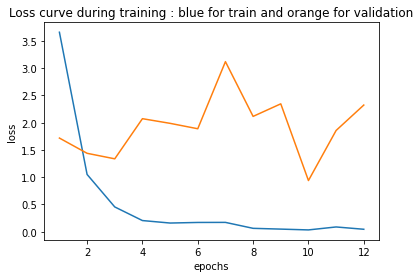

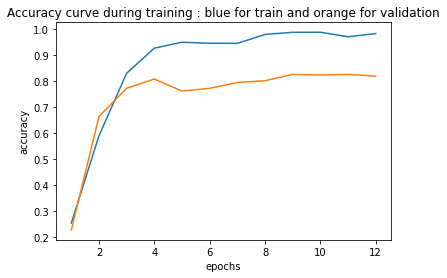

In [0]:
# plot loss functions curve function as epochs
plt.figure(1)
plt.plot(np.arange(1, 13), histObject.history['loss'])
plt.plot(np.arange(1, 13), histObject.history['val_loss'])
plt.title('Loss curve during training : blue for train and orange for validation')
plt.xlabel('epochs')
plt.ylabel('loss')
# plot accuracy curve function as epochs

plt.figure(2)
plt.plot(np.arange(1, 13), histObject.history['accuracy'])
plt.plot(np.arange(1, 13), histObject.history['val_accuracy'])
plt.title('Accuracy curve during training : blue for train and orange for validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()